Proposed Trading Strategy
-----
Description to be added shortly.


In [1]:
#Adding orders so often on the second level, why?

In [2]:
import pandas as pd
import numpy as np
import os
import math
import sys
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
sys.path.insert(0, os.path.join(os.getcwd(), 'code'))

import OrderBook as ob
import OrderUtil as ou
import TradingStrategySimulator as tss


In [3]:
#load in intc OrderBook data
book = ob.OrderBook(message_filename='INTC_message.csv', orderbook_filename='INTC_OrderBook.csv')

100% Accuracy
--------
Here we use an ideal 100% accurate model to see whether or not our strategy can be profitable

In [5]:
strat = {1: ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5]),
         -1 : ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])}
midprice_df = book.get_midprice_data(numupdates=1, t_start=35000, t_end=50000, tick_size=100, next_move=True)
midprice_df.dropna(inplace=True)

backtester = tss.StrategyLossEstimation(book=book, midprice_df=midprice_df, strategy=strat, relative_queue=0.1,
                                        max_exposure_dict={1:1, -1:1}, accuracy_rate=1, queue_tol=0.5,
                                        tick_size=100)
backtester.run_strategy_simulation()

Current time:        35004.165325977
Current pnl: 0.0
Current time:        35346.302228164
Current pnl: 350.0
Current time:        35683.574315923
Current pnl: 1800.0
Current time:        36004.676315666
Current pnl: 2600.0
Current time:        36220.624942718
Current pnl: 2400.0
Current time:        36507.113394756
Current pnl: 3400.0
Current time:        37123.126168205
Current pnl: 4100.0
Current time:        37568.316281126004
Current pnl: 4350.0
Current time:        38169.133375705
Current pnl: 5500.0
Current time:        38754.000484555
Current pnl: 6500.0
Current time:        39440.59777616
Current pnl: 7300.0
Current time:        39803.404938539
Current pnl: 7900.0
Current time:        40205.605567611005
Current pnl: 9000.0
Current time:        40614.581165504
Current pnl: 9050.0
Current time:        40941.827805866
Current pnl: 9500.0
Current time:        41674.926337076
Current pnl: 9800.0
Current time:        42080.161586656
Current pnl: 10600.0
Current time:        42746.92

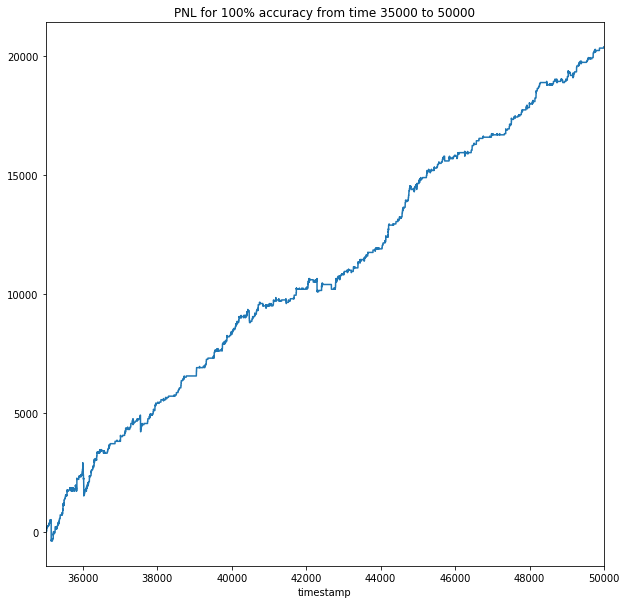

In [6]:
pnls = backtester._strategy_simulator.get_pnl_series()
pnls.cumsum().plot()
plt.title('PNL for 100% accuracy from time 35000 to 50000')
plt.show()

60% Accuracy
---------
Here we test a hypothetical model that has an average of 70% out of sample accuracy

In [8]:
strat = {1: ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5]),
         -1 : ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])}
midprice_df = book.get_midprice_data(numupdates=1, t_start=35000, t_end=50000, tick_size=100, next_move=True)
midprice_df.dropna(inplace=True)

backtester = tss.StrategyLossEstimation(book=book, midprice_df=midprice_df, strategy=strat, relative_queue=0.1,
                                        max_exposure_dict={1:1, -1:1}, accuracy_rate=0.6, queue_tol=0.5,
                                        tick_size=100)
backtester.run_strategy_simulation()

Current time:        35004.165325977
Current pnl: 0.0
Current time:        35346.302228164
Current pnl: -250.0
Current time:        35683.574315923
Current pnl: 500.0
Current time:        36004.676315666
Current pnl: 1200.0
Current time:        36220.624942718
Current pnl: 600.0
Current time:        36507.113394756
Current pnl: 1500.0
Current time:        37123.126168205
Current pnl: 2100.0
Current time:        37568.316281126004
Current pnl: 2150.0
Current time:        38169.133375705
Current pnl: 3200.0
Current time:        38754.000484555
Current pnl: 4100.0
Current time:        39440.59777616
Current pnl: 4700.0
Current time:        39803.404938539
Current pnl: 5000.0
Current time:        40205.605567611005
Current pnl: 5900.0
Current time:        40614.581165504
Current pnl: 5800.0
Current time:        40941.827805866
Current pnl: 6100.0
Current time:        41674.926337076
Current pnl: 6200.0
Current time:        42080.161586656
Current pnl: 6700.0
Current time:        42746.9266

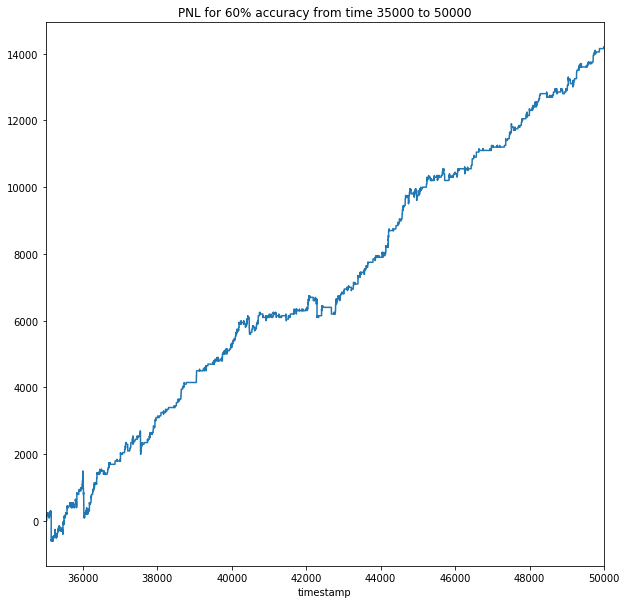

In [10]:
pnls = backtester._strategy_simulator.get_pnl_series()
pnls.cumsum().plot()
plt.title('PNL for 60% accuracy from time 35000 to 50000')
plt.show()

Strategy Tested Using Simple Prediction Model
--------
When bid level 1 quantity is greater than or equal to ask level 1 quantity we predict an up move, otherwise we predict a down move.

In [14]:
strat = {1: ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5]),
         -1 : ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])}
midprice_df = book.get_midprice_data(numupdates=1, t_start=35000, t_end=50000, tick_size=100, next_move=True)
midprice_df.dropna(inplace=True)
pred = (midprice_df['bq1'] >= midprice_df['aq1']).astype(int)
pred = 2.0*(pred - 0.5)
backtester = tss.TradingStrategyBacktester(book=book, midprice_df=midprice_df, strategy=strat, relative_queue=0.1,
                                           predictions=pred,
                                           max_exposure_dict={1:1, -1:1}, queue_tol=0.5,
                                           tick_size=100)
backtester.run_strategy()

Current time:        35004.165325977
Current pnl: 0.0
Current time:        35346.302228164
Current pnl: -850.0
Current time:        35683.574315923
Current pnl: -750.0
Current time:        36004.676315666
Current pnl: -1850.0
Current time:        36220.624942718
Current pnl: -2900.0
Current time:        36507.113394756
Current pnl: -2850.0
Current time:        37123.126168205
Current pnl: -2900.0
Current time:        37568.316281126004
Current pnl: -4450.0
Current time:        38169.133375705
Current pnl: -4400.0
Current time:        38754.000484555
Current pnl: -4050.0
Current time:        39440.59777616
Current pnl: -4000.0
Current time:        39803.404938539
Current pnl: -4350.0
Current time:        40205.605567611005
Current pnl: -5000.0
Current time:        40614.581165504
Current pnl: -6300.0
Current time:        40941.827805866
Current pnl: -6950.0
Current time:        41674.926337076
Current pnl: -7300.0
Current time:        42080.161586656
Current pnl: -7600.0
Current time:  

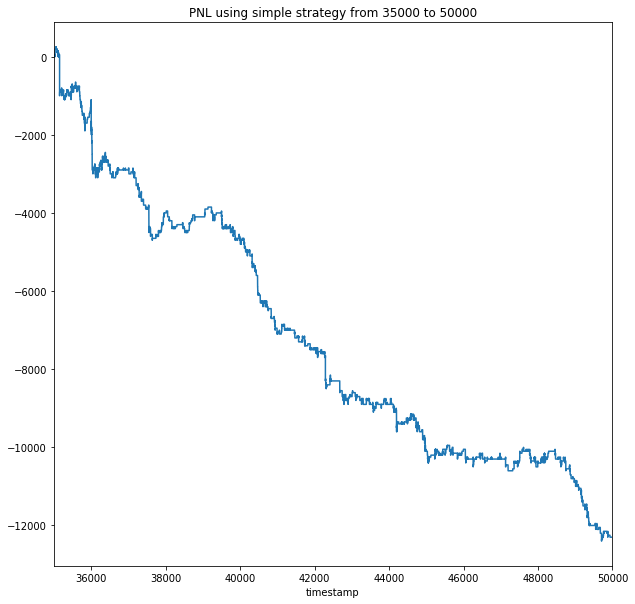

In [15]:
pnls = backtester.get_pnl_series()
pnls.cumsum().plot()
plt.title('PNL using simple strategy from 35000 to 50000')
plt.show()